# Análise e Previsão de Receita em um Ambiente de E-commerce

Este projeto tem como objetivo realizar uma análise abrangente dos dados de um site de comércio eletrônico e desenvolver modelos de machine learning para prever a receita gerada por visitantes. O conjunto de dados inclui uma variedade de métricas relacionadas às atividades dos usuários no site, como páginas administrativas, informativas e de produtos visitadas duração das sessões, taxas de rejeição e saída, valores médios por página, entre outros.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/home/leticia/Downloads/compras_online.csv')

In [3]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
#Renomeando as colunas para melhor entendimento dos dados
df.rename(columns={
    'Administrative' : 'pag_administrativa',
    'Administrative_Duration' : 'pag_administrativa_duracao',
    'Informational' : 'pag_informativa',
    'Informational_Duration' : 'pag_informativa_duracao',
    'ProductRelated' : 'pag_produto',
    'ProductRelated_Duration' : 'pag_produto_duracao',
    'BounceRates' : 'taxa_rejeicao',
    'ExitRates' : 'taxa_saida',
    'PageValues' : 'valor_pagina',
    'SpecialDay' : 'dia_especial',
    'Month' : 'mes',
    'OperatingSystems' : 'sistema_operacional',
    'Region' : 'regiao',
    'TrafficType' : 'tipo_trafego',
    'VisitorType' : 'tipo_visitante',
    'Weekend' : 'fim_de_semana',
    'Revenue' : 'receita'
}, inplace=True)

In [5]:
df.shape

(12330, 18)

In [6]:
df.isnull().sum()

pag_administrativa            0
pag_administrativa_duracao    0
pag_informativa               0
pag_informativa_duracao       0
pag_produto                   0
pag_produto_duracao           0
taxa_rejeicao                 0
taxa_saida                    0
valor_pagina                  0
dia_especial                  0
mes                           0
sistema_operacional           0
Browser                       0
regiao                        0
tipo_trafego                  0
tipo_visitante                0
fim_de_semana                 0
receita                       0
dtype: int64

# Análise Exploratória dos Dados:

Inicialmente, exploramos as relações entre diferentes variáveis, como o número de páginas visitadas e o tempo gasto, usando gráficos de dispersão e pairplots. Isso nos ajuda a entender como esses fatores podem influenciar a receita gerada pelo site.
Analisamos também a distribuição da receita em relação a eventos especiais, como feriados ou datas comemorativas, e em finais de semana. Essas análises nos fornecem insights sobre padrões sazonais ou comportamentos de compra específicos.

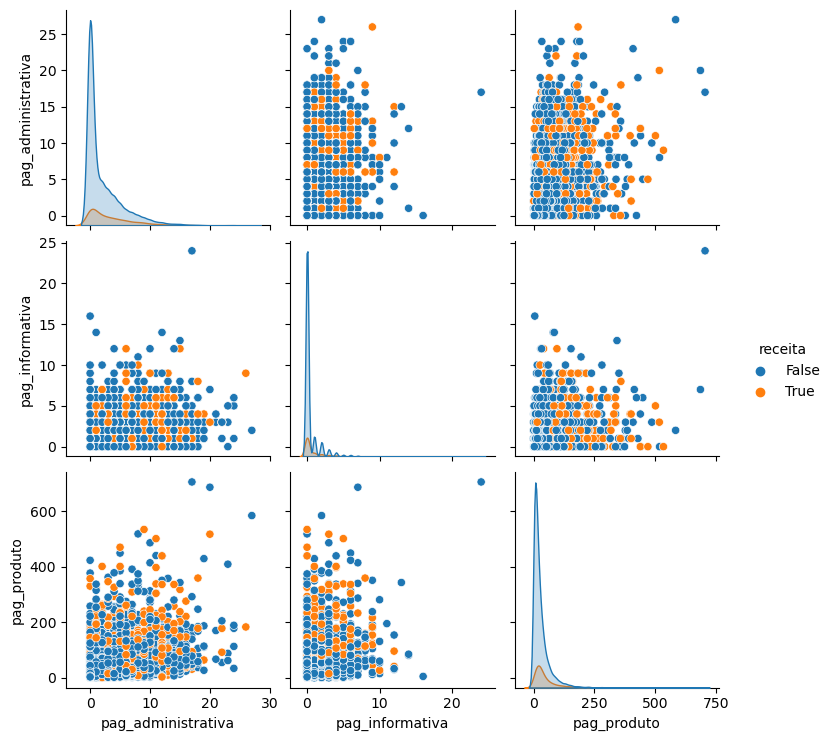

In [7]:
sns.pairplot(df, hue='receita', vars=['pag_administrativa', 'pag_informativa', 'pag_produto'])
plt.show()

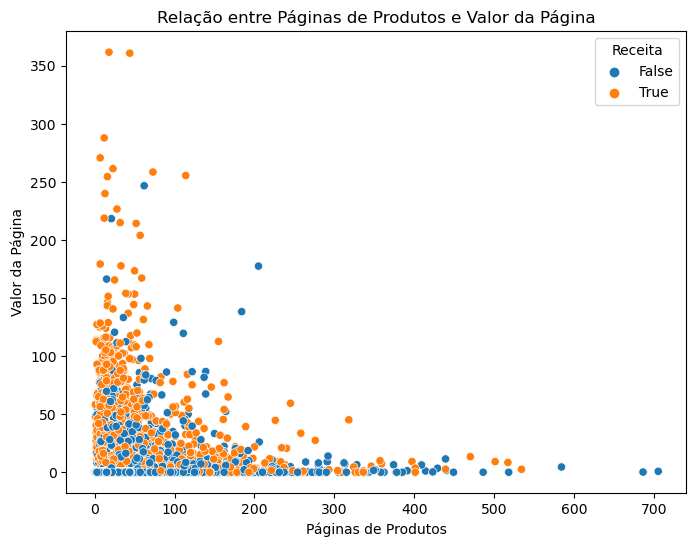

In [8]:
# Scatterplot de relação entre 'produto_relacionado' e 'valor_pagina'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pag_produto', y='valor_pagina', hue='receita', data=df)
plt.title('Relação entre Páginas de Produtos e Valor da Página')
plt.xlabel('Páginas de Produtos')
plt.ylabel('Valor da Página')
plt.legend(title='Receita')
plt.show()

O valor da página representa o valor médio de uma página da web que um usuário visitou antes de concluir uma transação no comércio eletrônico, conforme fornecido pelo Google Analytics. No gráfico apresentado, podemos analisar a relação entre o valor da página e a página de produto, observando que há uma tendência de aumento na taxa de conversão conforme o valor da página aumenta. Isso sugere que quanto maior o valor atribuído a uma página em termos de engajamento ou relevância para o usuário, maior é a probabilidade de resultar em uma transação concluída. Essa visualização é valiosa para entender como diferentes páginas afetam o comportamento do usuário e influenciam as conversões no contexto do comércio eletrônico.

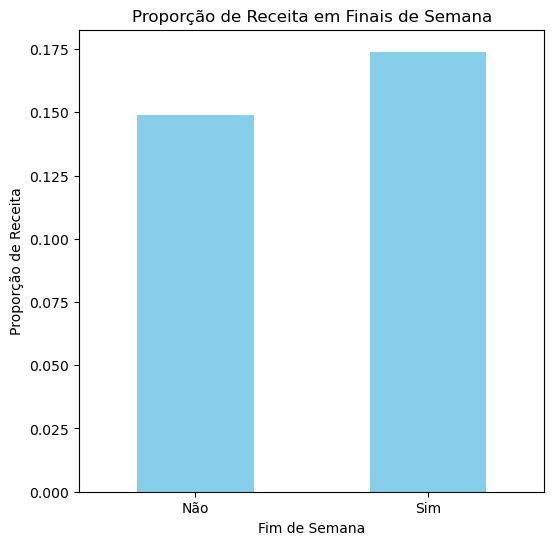

In [9]:
plt.figure(figsize=(6, 6))
df['fim_de_semana'] = df['fim_de_semana'].astype(int)
df.groupby('fim_de_semana')['receita'].mean().plot(kind='bar', color='skyblue')
plt.title('Proporção de Receita em Finais de Semana')
plt.xlabel('Fim de Semana')
plt.ylabel('Proporção de Receita')
plt.xticks([0, 1], ['Não', 'Sim'], rotation=0)
plt.show()

Observamos a partir deste gráfico que a receita tende a ser mais elevada nos finais de semana.

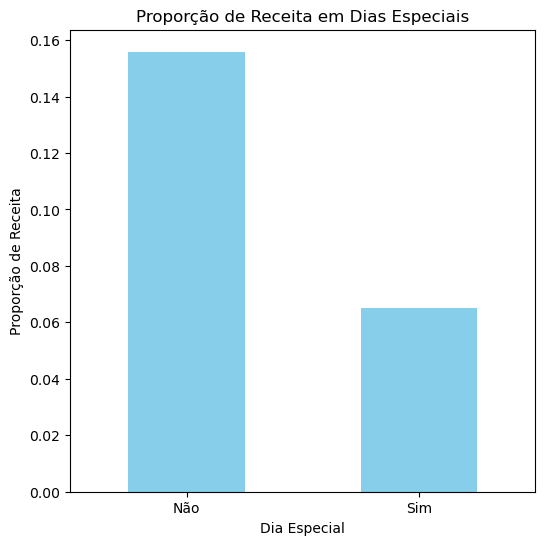

In [10]:
plt.figure(figsize=(6, 6))
df['dia_especial'] = df['dia_especial'].astype(int)
df.groupby('dia_especial')['receita'].mean().plot(kind='bar', color='skyblue')
plt.title('Proporção de Receita em Dias Especiais')
plt.xlabel('Dia Especial')
plt.ylabel('Proporção de Receita')
plt.xticks([0, 1], ['Não', 'Sim'], rotation=0)
plt.show()

Neste gráfico, é evidente que a receita apresenta picos significativos em dias especiais, como Dia das Mães, Dia dos Namorados, entre outros.

In [11]:
taxa_conversao = df.groupby('pag_produto')['receita'].mean().reset_index()

# Ordenar os resultados para encontrar a página de produto com a maior taxa de conversão
pagina_maior_taxa_conversao = taxa_conversao.sort_values(by='receita', ascending=False).iloc[0]

# Exibir a página de produto com a maior taxa de conversão e sua taxa correspondente
print(f"Página de Produto com Maior Taxa de Conversão: {pagina_maior_taxa_conversao['pag_produto']}")
print(f"Taxa de Conversão: {pagina_maior_taxa_conversao['receita']:.2%}")


Página de Produto com Maior Taxa de Conversão: 276.0
Taxa de Conversão: 100.00%


Dia Especial com Maior Receita:
dia_especial      1
mes             May
receita           9
Name: 1, dtype: object


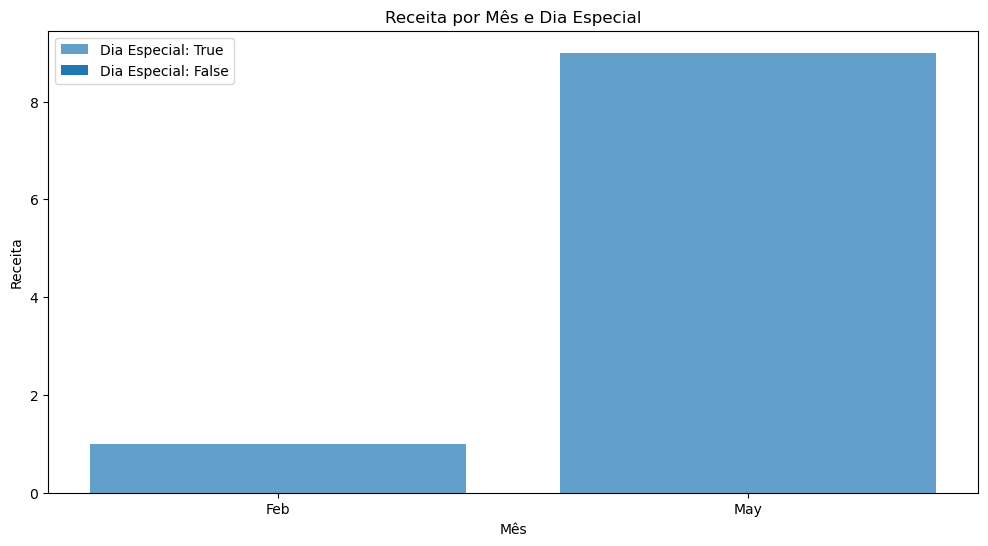

In [12]:

# Filtra o DataFrame para incluir apenas os dias especiais com receita (dia_especial = True e receita = True)
df_dias_especiais_com_receita = df[(df['dia_especial'] == True) & (df['receita'] == True)]

# Agrupa e soma a receita por dia especial e mês
receita_por_dia_mes_especial = df_dias_especiais_com_receita.groupby(['dia_especial', 'mes'])['receita'].sum().reset_index()

# Encontra o dia especial com a maior receita
dia_especial_maior_receita = receita_por_dia_mes_especial.loc[receita_por_dia_mes_especial['receita'].idxmax()]

# Exibi o resultado do dia especial com maior receita
print("Dia Especial com Maior Receita:")
print(dia_especial_maior_receita)

# Gera o gráfico de barras para visualizar a receita por dia especial e mês
plt.figure(figsize=(12, 6))
for dia_especial in [True, False]:  # Iterar sobre os valores de dia_especial (True e False)
    dados_plot = receita_por_dia_mes_especial[receita_por_dia_mes_especial['dia_especial'] == dia_especial]
    plt.bar(dados_plot['mes'], dados_plot['receita'], label=f'Dia Especial: {dia_especial}', alpha=0.7)

plt.title('Receita por Mês e Dia Especial')
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.legend()
plt.show()


Neste gráfico, observamos que o mês com o dia especial de maior receita foi maio, indicando possivelmente o Dia das Mães como um fator significativo para essa alta.

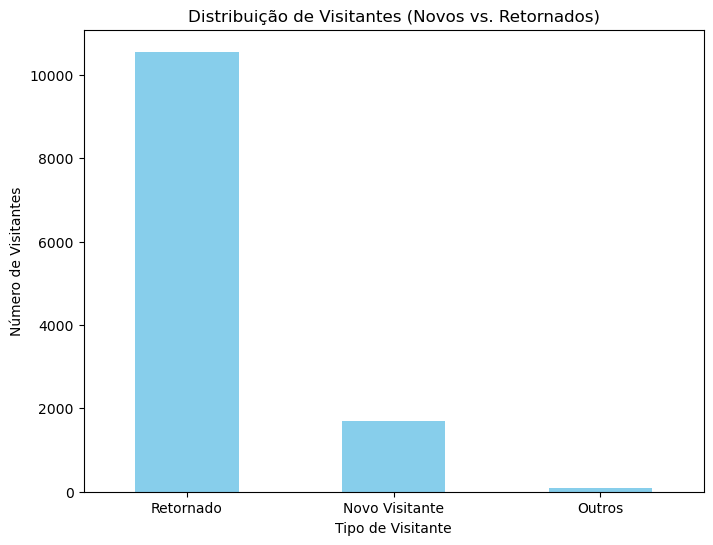

In [13]:
# Conta o número de visitantes por tipo de visitante (tipo_visitante)
contagem_tipo_visitante = df['tipo_visitante'].value_counts()

# Cria o gráfico de barras
plt.figure(figsize=(8, 6))
contagem_tipo_visitante.plot(kind='bar', color='skyblue')
plt.title('Distribuição de Visitantes (Novos vs. Retornados)')
plt.xlabel('Tipo de Visitante')
plt.ylabel('Número de Visitantes')
plt.xticks([0, 1, 2], ['Retornado', 'Novo Visitante', 'Outros'],rotation=0)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.show()


Neste gráfico, podemos observar que a maioria das visitas é feita por visitantes que retornaram ao site, indicando uma proporção significativa de usuários que já estiveram no site anteriormente.

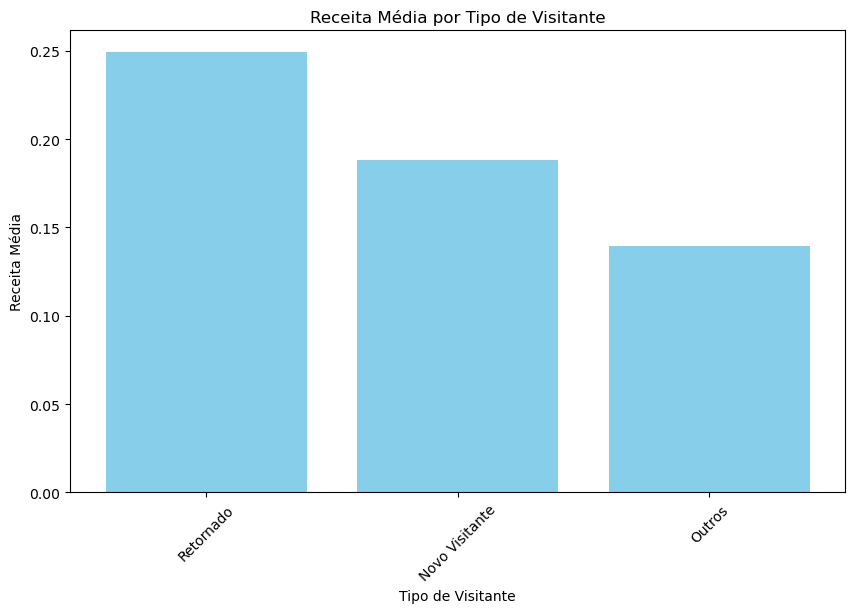

In [14]:
# Agrupa os dados por tipo de visitante e calcula a receita média para cada grupo
receita_por_tipo_visitante = df.groupby('tipo_visitante')['receita'].mean().reset_index()

# Ordena os dados pela receita média em ordem decrescente
receita_por_tipo_visitante = receita_por_tipo_visitante.sort_values(by='receita', ascending=False)

# Plot o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(receita_por_tipo_visitante['tipo_visitante'], receita_por_tipo_visitante['receita'], color='skyblue')
plt.title('Receita Média por Tipo de Visitante')
plt.xlabel('Tipo de Visitante')
plt.ylabel('Receita Média')
plt.xticks([0, 1, 2], ['Retornado', 'Novo Visitante', 'Outros'], rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.show()


In [15]:
df.dtypes

pag_administrativa              int64
pag_administrativa_duracao    float64
pag_informativa                 int64
pag_informativa_duracao       float64
pag_produto                     int64
pag_produto_duracao           float64
taxa_rejeicao                 float64
taxa_saida                    float64
valor_pagina                  float64
dia_especial                    int64
mes                            object
sistema_operacional             int64
Browser                         int64
regiao                          int64
tipo_trafego                    int64
tipo_visitante                 object
fim_de_semana                   int64
receita                          bool
dtype: object

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
mes_encoder = LabelEncoder()
tipo_visitante_encoder = mes_encoder

In [18]:
df['mes'] = mes_encoder.fit_transform(df['mes'])
df['tipo_visitante'] = tipo_visitante_encoder.fit_transform(df['mes'])

In [19]:
X = df.drop(['receita'], axis=1) 
y = df['receita']

In [20]:
#escalonamento dos dados para que o algortimo nao atribua uma maior importancia a alguns dados e outros nao
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [21]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=0)

# Modelagem de Machine Learning:

Utilizamos técnicas de pré-processamento, como codificação de variáveis categóricas e escalonamento de dados, para preparar os dados para modelagem.
Experimentamos diferentes algoritmos de regressão, como Regressão Linear e Random Forest Regression, para prever a receita com base nas atividades dos usuários. Avaliamos o desempenho desses modelos usando métricas como Erro Quadrático Médio (MSE) e Coeficiente de Determinação (R²). 

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicializa e treina o modelo de Regressão Linear
regressor_lr = LinearRegression()
regressor_lr.fit(X_treino, y_treino)

previsao_lr = regressor_lr.predict(X_teste)

# Avaliação do desempenho do modelo de Regressão Linear
mse = mean_squared_error(y_teste, previsao_lr)
r2 = r2_score(y_teste, previsao_lr)

print(f'Erro Quadrático Médio (MSE): {mse}')
print(f'Coeficiente de Determinação (R²): {r2}')

Erro Quadrático Médio (MSE): 0.8028190533228537
Coeficiente de Determinação (R²): 0.2492907990551987


In [23]:
from sklearn.ensemble import RandomForestRegressor

# Cria e treina o modelo RandomForestRegressor
regressor_rfr = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
regressor_rfr.fit(X_treino, y_treino)

previsao_rfr = regressor_rfr.predict(X_teste)

mse = mean_squared_error(y_teste, previsao_rfr)
r2 = r2_score(y_teste, previsao_rfr)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")


Erro Quadrático Médio (MSE): 0.58501493656511
Coeficiente de Determinação (R²): 0.45295755780605185
